<a href="https://colab.research.google.com/github/roadrunner890/SyntheticLiver-Cancer/blob/main/SynthethicAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import History 
from random import randint
import matplotlib.pyplot as plt
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.pyplot as pp
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [31]:
# Create 1000 squares
NUM_SQUARES = 1000
X_train = []
for i in range(NUM_SQUARES):
    exp = np.zeros((28, 28)) #  28*28 canvas 
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    X_train.append(exp)

In [32]:
 # Add blurred/noisy/flipped to squares
blurred_x = []
noisy_x = []  
fliplr_x = []

for x in X_train:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

for x in range(1000):
  fliplr_x.append(np.fliplr(X_train[x]))

In [33]:
# Create 1000 circles
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
print(len(X_train))

2000


In [34]:
 # Add blurred/noisy/flipped to circles
for x in X_train[1000:]:
    blurred_x.append(gaussian(x, sigma=0.5))
    noisy_x.append(random_noise(x))

for x in range(1000, 2000):
  fliplr_x.append(np.fliplr(X_train[x]))

print(len(blurred_x))
print(len(noisy_x))
print(len(fliplr_x))

# create lists to numpy arrays
X_train = np.array(X_train)
fliplr_x = np.array(fliplr_x)
noisy_x = np.array(noisy_x)
blurred_x = np.array(blurred_x)

2000
2000
2000


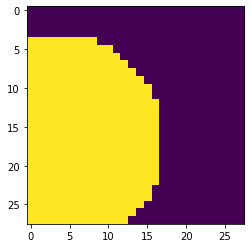

In [35]:
# 0-1000 are squares, 1000-2000 are circles
index = 1350
plt.imshow(X_train[index])

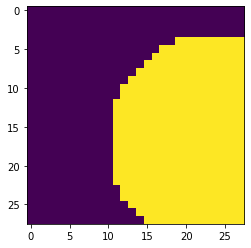

In [36]:
plt.imshow(fliplr_x[index])

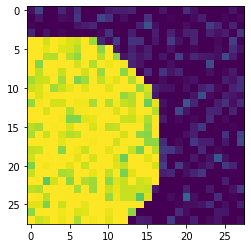

In [37]:
plt.imshow(noisy_x[index])

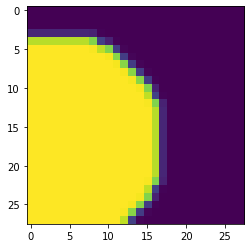

In [38]:
plt.imshow(blurred_x[index])

In [39]:
# Labels
# Squares with 0, Circles with 1
Y_train = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])
fliplr_y = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])
noisy_y = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])
blurred_y = np.array([1 if i < NUM_SQUARES else 0 for i in range(NUM_SQUARES * 2)])

In [40]:
# Shuffle training data
shuffler = np.random.permutation(NUM_SQUARES*2)
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]

fliplr_x = fliplr_x[shuffler]
fliplr_y = fliplr_y[shuffler]

noisy_x = noisy_x[shuffler]
noisy_y = noisy_y[shuffler]

blurred_x = blurred_x[shuffler]
blurred_y = blurred_y[shuffler]

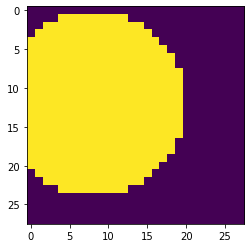

In [41]:
# Show that images/labels have been shuffled
plt.imshow(X_train[index])

In [42]:
# 85% of 2000 images is training data and 15% is testing data
NUM_TRAIN = int(NUM_SQUARES*2*0.85)
X_test = X_train[NUM_TRAIN:]
Y_test = Y_train[NUM_TRAIN:]
X_train = X_train[:NUM_TRAIN]
Y_train = Y_train[:NUM_TRAIN]
 
fliplr_x_test = fliplr_x[NUM_TRAIN:]
fliplr_y_test = fliplr_y[NUM_TRAIN:]
fliplr_x = fliplr_x[:NUM_TRAIN]
fliplr_y = fliplr_y[:NUM_TRAIN]

noisy_x_test = noisy_x[NUM_TRAIN:]
noisy_y_test = noisy_y[NUM_TRAIN:]
noisy_x = noisy_x[:NUM_TRAIN]
noisy_y = noisy_y[:NUM_TRAIN]

blurred_x_test = blurred_x[NUM_TRAIN:]
blurred_y_test = blurred_y[NUM_TRAIN:]
blurred_x = blurred_x[:NUM_TRAIN]
blurred_y = blurred_y[:NUM_TRAIN]

In [43]:
# Flatten all data for input layer
X_train_flattened = X_train.reshape(len(X_train), 28*28)
fliplr_x_flattened = fliplr_x.reshape(len(fliplr_x), 28*28)
noisy_x_flattened = noisy_x.reshape(len(noisy_x), 28*28)
blurred_x_flattened = blurred_x.reshape(len(blurred_x), 28*28)

In [44]:
# Normal Dataset
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8012
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 0.2432 - accuracy: 0.9047
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1728 - accuracy: 0.9276
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.9224
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1347 - accuracy: 0.9341
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1071 - accuracy: 0.9471
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9541
Epoch 8/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9541
Epoch 9/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.9624
Epoch 10/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9524


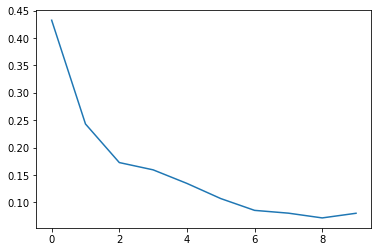

In [45]:
# Graph of Normal Dataset
losses = history.history['loss']
timeline = np.arange(len(losses))
pp.plot(timeline, losses)
pp.show()

In [46]:
# Flipped Dataset
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(fliplr_x_flattened, fliplr_y, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 1s 3ms/step - loss: 0.4435 - accuracy: 0.8018
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.8912
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.9218
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1329 - accuracy: 0.9465
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1451 - accuracy: 0.9271
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9453
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9559
Epoch 8/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0964 - accuracy: 0.9412
Epoch 9/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.9506
Epoch 10/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9524


In [47]:
# Noisy Dataset

history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(noisy_x_flattened, noisy_y, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.7824
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.8859
Epoch 3/10
54/54 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.8894
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1649 - accuracy: 0.9376
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1184 - accuracy: 0.9606
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0912 - accuracy: 0.9759
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0520 - accuracy: 0.9882
Epoch 8/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0757 - accuracy: 0.9794
Epoch 9/10
54/54 [==============================] - 0s 4ms/step - loss: 0.0517 - accuracy: 0.9894
Epoch 10/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9924


In [48]:
# Blurred Dataset
history = History()
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(blurred_x_flattened, blurred_y, epochs=10, callbacks=[history])

Epoch 1/10
54/54 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8253
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.2906 - accuracy: 0.8841
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1921 - accuracy: 0.9206
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9176
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9282
Epoch 6/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1736 - accuracy: 0.9147
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 0.1290 - accuracy: 0.9365
Epoch 8/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9441
Epoch 9/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0856 - accuracy: 0.9588
Epoch 10/10
54/54 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9500


In [49]:
# Normal
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# reshape Data for Input layer
n_images = len(X_train)
x_wanted = X_train.reshape(n_images, 28, 28, 1)
x_wanted.shape

cnn.fit(x_wanted, Y_train, epochs=10)

Epoch 1/10
54/54 [==============================] - 2s 26ms/step - loss: 0.4887 - accuracy: 0.7506
Epoch 2/10
54/54 [==============================] - 1s 26ms/step - loss: 0.2260 - accuracy: 0.8988
Epoch 3/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1499 - accuracy: 0.9353
Epoch 4/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1274 - accuracy: 0.9412
Epoch 5/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1169 - accuracy: 0.9447
Epoch 6/10
54/54 [==============================] - 1s 25ms/step - loss: 0.1092 - accuracy: 0.9453
Epoch 7/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1054 - accuracy: 0.9476
Epoch 8/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1072 - accuracy: 0.9488
Epoch 9/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1012 - accuracy: 0.9488
Epoch 10/10
54/54 [==============================] - 1s 27ms/step - loss: 0.0975 - accuracy: 0.9506


In [50]:
# Flipped
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# reshape Data for Input layer
n_images = len(X_train)
x_wanted = fliplr_x.reshape(n_images, 28, 28, 1)
x_wanted.shape

cnn.fit(x_wanted, fliplr_y, epochs=10)

Epoch 1/10
54/54 [==============================] - 2s 26ms/step - loss: 0.4805 - accuracy: 0.7829
Epoch 2/10
54/54 [==============================] - 1s 26ms/step - loss: 0.2293 - accuracy: 0.8976
Epoch 3/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1510 - accuracy: 0.9329
Epoch 4/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1305 - accuracy: 0.9412
Epoch 5/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1168 - accuracy: 0.9447
Epoch 6/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1134 - accuracy: 0.9435
Epoch 7/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1077 - accuracy: 0.9447
Epoch 8/10
54/54 [==============================] - 2s 32ms/step - loss: 0.1026 - accuracy: 0.9482
Epoch 9/10
54/54 [==============================] - 2s 32ms/step - loss: 0.1001 - accuracy: 0.9494
Epoch 10/10
54/54 [==============================] - 2s 32ms/step - loss: 0.0984 - accuracy: 0.9512


In [51]:
# Noisy
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# reshape Data for Input layer
n_images = len(X_train)
x_wanted = noisy_x.reshape(n_images, 28, 28, 1)
x_wanted.shape

cnn.fit(x_wanted, noisy_y, epochs=10)

Epoch 1/10
54/54 [==============================] - 3s 40ms/step - loss: 0.5457 - accuracy: 0.7106
Epoch 2/10
54/54 [==============================] - 2s 33ms/step - loss: 0.2976 - accuracy: 0.8682
Epoch 3/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1974 - accuracy: 0.9182
Epoch 4/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1528 - accuracy: 0.9329
Epoch 5/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1354 - accuracy: 0.9453
Epoch 6/10
54/54 [==============================] - 1s 28ms/step - loss: 0.1249 - accuracy: 0.9447
Epoch 7/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1132 - accuracy: 0.9494
Epoch 8/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1067 - accuracy: 0.9524
Epoch 9/10
54/54 [==============================] - 2s 28ms/step - loss: 0.1038 - accuracy: 0.9518
Epoch 10/10
54/54 [==============================] - 1s 27ms/step - loss: 0.0987 - accuracy: 0.9588


In [52]:
# Blur
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# reshape Data for Input layer
n_images = len(X_train)
x_wanted = blurred_x.reshape(n_images, 28, 28, 1)
x_wanted.shape

cnn.fit(x_wanted, blurred_y, epochs=10)

Epoch 1/10
54/54 [==============================] - 2s 27ms/step - loss: 0.5145 - accuracy: 0.7435
Epoch 2/10
54/54 [==============================] - 1s 27ms/step - loss: 0.2584 - accuracy: 0.8859
Epoch 3/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1657 - accuracy: 0.9265
Epoch 4/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1340 - accuracy: 0.9388
Epoch 5/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1226 - accuracy: 0.9447
Epoch 6/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1201 - accuracy: 0.9371
Epoch 7/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1110 - accuracy: 0.9500
Epoch 8/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1117 - accuracy: 0.9476
Epoch 9/10
54/54 [==============================] - 1s 27ms/step - loss: 0.1116 - accuracy: 0.9424
Epoch 10/10
54/54 [==============================] - 1s 26ms/step - loss: 0.1083 - accuracy: 0.9471
